# Titanic Dataset Logistic Regression


The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we try to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

In [1]:
# Import Statements
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [2]:
# Reading CSV files train and test
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
# Copying the train and test data frames
df_train = train_df.copy()
df_test = test_df.copy()

In [4]:
# First 5 rows for train data frame
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# First 5 rows of test data frame
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Count of values in train and test data frames
print("Number of Train Data is {}.".format(df_train.shape[0]))
print("Number of Test Data is {}.".format(df_test.shape[0]))

Number of Train Data is 891.
Number of Test Data is 418.


In [7]:
# Dropping passengerId, Name and Ticket from train and test dataframe
df_train = df_train.drop(["PassengerId","Name","Ticket"],axis=1)
df_test = df_test.drop(["PassengerId","Name","Ticket"],axis=1)

In [8]:
# Checking null values in train data frame
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# Checking null values in test data frame 
df_test.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
# Function to view Missing Valuess
def missingtraindata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(6,4))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="blue",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


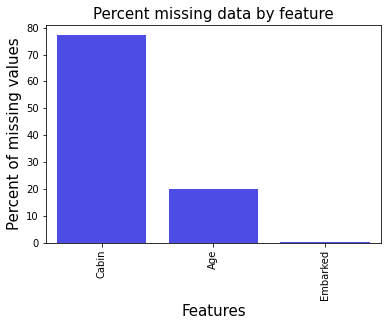

In [11]:
# Missing value for train data frame
missingtraindata(df_train)

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


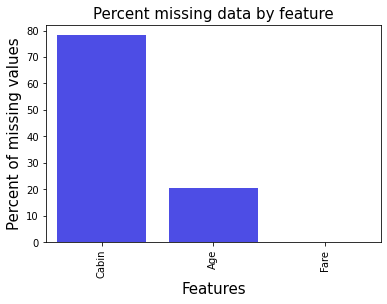

In [12]:
missingtraindata(df_test)

In [13]:
# Printing percent of missing Age records for train and test data 
print('Percent of missing "Age" records for train data is %.2f%%' %((df_train['Age'].isnull().sum()/df_train.shape[0])*100))
print('Percent of missing "Age" records for test set is %.2f%%' %((df_test['Age'].isnull().sum()/df_test.shape[0])*100))

Percent of missing "Age" records for train data is 19.87%
Percent of missing "Age" records for test set is 20.57%


In [14]:
# Prinitng percentage of missing Embarked records for train data
print('Percent of missing "Embarked" records for train data is %.2f%%' %((df_train['Embarked'].isnull().sum()/df_train.shape[0])*100))

Percent of missing "Embarked" records for train data is 0.22%


In [15]:
# Prinitng percentage of missing Fare records for test data
print('Percent of missing "Fare" records for test data is %.2f%%' %((df_test['Fare'].isnull().sum()/df_test.shape[0])*100))

Percent of missing "Fare" records for test data is 0.24%


In [16]:
# Printing percentage of missing cabin records for train and test data
print('Percent of missing "Cabin" records for train data is %.2f%%' %((df_train['Cabin'].isnull().sum()/df_train.shape[0])*100))
print('Percent of missing "Cabin" records for test data is %.2f%%' %((df_test['Cabin'].isnull().sum()/df_test.shape[0])*100))

Percent of missing "Cabin" records for train data is 77.10%
Percent of missing "Cabin" records for test data is 78.23%


Boarded passengers grouped by port of embarkation for train data(C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


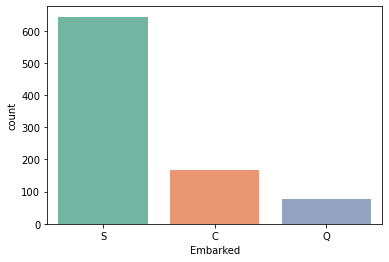

In [17]:
# BarPlot to check embarkation for train data 
print('Boarded passengers grouped by port of embarkation for train data(C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_train, palette='Set2')
plt.show()

Boarded passengers grouped by port of embarkation for test data(C = Cherbourg, Q = Queenstown, S = Southampton):
S    270
C    102
Q     46
Name: Embarked, dtype: int64


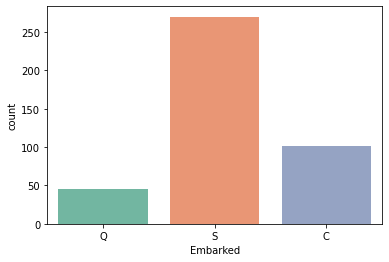

In [18]:
# BarPlot to check embarkation for test data 
print('Boarded passengers grouped by port of embarkation for test data(C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df_test['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df_test, palette='Set2')
plt.show()

In [19]:
# Printing train and test data most common embarkation
print('The most common boarding port of embarkation for train data is %s.' %df_train['Embarked'].value_counts().idxmax())
print('The most common boarding port of embarkation for test data is %s.' %df_test['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation for train data is S.
The most common boarding port of embarkation for test data is S.


In [20]:
# Replacing Age missing values with median, Embarked with most commonly embarkation and droping cabin missing values
df_train["Age"].fillna(df_train["Age"].median(skipna=True), inplace=True)
df_train["Embarked"].fillna(df_train['Embarked'].value_counts().idxmax(), inplace=True)
df_train.drop('Cabin', axis=1, inplace=True)

In [21]:
df_train['TravelAlone']=np.where((df_train["SibSp"]+df_train["Parch"])>0, 0, 1)
df_train.drop('SibSp', axis=1, inplace=True)
df_train.drop('Parch', axis=1, inplace=True)

In [22]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [23]:
df_train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

In [24]:
# Replacing Age missing values with median, Fare with median and droping cabin missing values
df_test["Age"].fillna(df_test["Age"].median(skipna=True), inplace=True)
df_test["Fare"].fillna(df_test["Fare"].median(skipna=True), inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [25]:
df_test['TravelAlone']=np.where((df_test["SibSp"]+df_test["Parch"])>0, 0, 1)
df_test.drop('SibSp', axis=1, inplace=True)
df_test.drop('Parch', axis=1, inplace=True)

In [26]:
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,TravelAlone
0,3,male,34.5,7.8292,Q,1
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,1
4,3,female,22.0,12.2875,S,0


In [27]:
df_test.isnull().sum()

Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


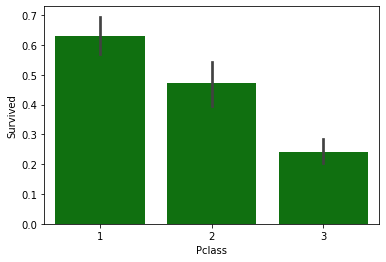

In [29]:
# Passenger Class vs Survived Count
sns.barplot('Pclass','Survived',data=df_train,color="green")
plt.show()

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


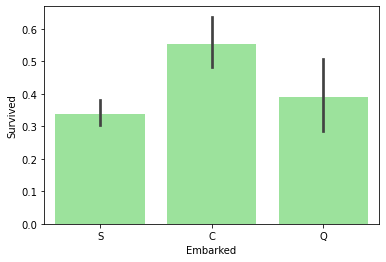

In [30]:
# Embarkation vs Survived count 
sns.barplot('Embarked', 'Survived', data=df_train, color="lightgreen")
plt.show()


/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


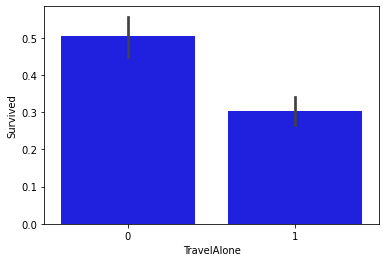

In [31]:
# Traveling alone vs Survived count 
sns.barplot('TravelAlone', 'Survived', data=df_train, color="blue")
plt.show()

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


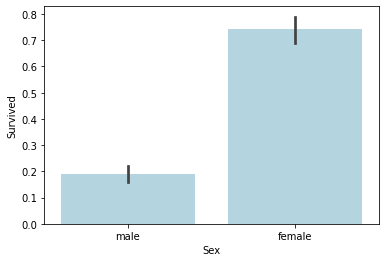

In [32]:
# Male/Female vs Survived count 
sns.barplot('Sex', 'Survived', data=df_train, color="lightblue")
plt.show()

In [33]:
# Encoding Pclass, Embarked, Sex for train data
df_train=pd.get_dummies(df_train, columns=["Pclass","Embarked","Sex"])
df_train.drop('Sex_female', axis=1, inplace=True)
df_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


In [34]:
# Encoding Pclass, Embarked, Sex for test data
df_test = pd.get_dummies(df_test,columns=["Pclass","Embarked","Sex"])
df_test.drop('Sex_female',axis=1,inplace=True)
df_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


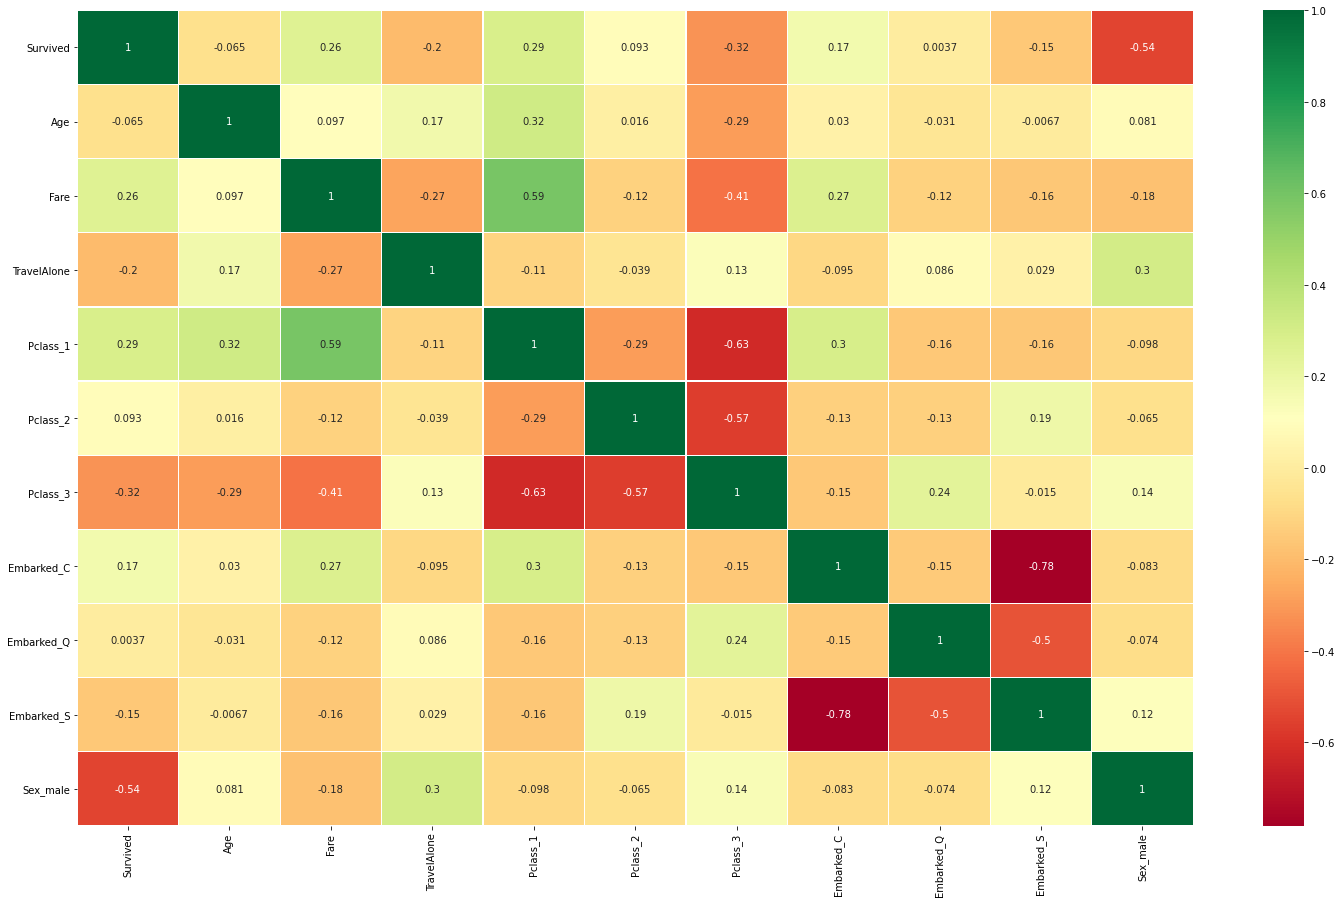

In [36]:
# Heat map for training data frame
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(25,15)
plt.show()

In [37]:
# X = Training data without survived class
X = df_train.drop("Survived",axis=1)
# y = Class labels only
y = df_train["Survived"]

In [38]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 10)

In [39]:
# Logistic Regression 
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X_train,y_train)

/home/absolutelyharsh/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
# Logistic Regression Model Stats
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8324022346368715
Survived 62
NOT Survived 117


In [43]:
# Accuracy of Logistic Regression
prediction_lr=logmodel.predict(X_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))

The accuracy of the Logistic Regression is 83.24


In [44]:
# Creating Submission File
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": y_test})
submission['Survived'] = submission['Survived'].fillna(0)
submission['PassengerId'] = submission['PassengerId'].fillna(0)
submission

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,0.0
...,...,...
851,0.0,0.0
861,0.0,0.0
870,0.0,0.0
876,0.0,0.0
